## 1. Introduction
<p><img style="float: right ; margin: 5px 20px 5px 10px; width: 45%" src="https://github.com/MyreLab/ulysses-sentiment-analysis/blob/main/datasets/ulysses_img.jpg?raw=true"></p>
<p>What are the main entities in James Joyce's novel <i>Ulysses</i>, and can we compute their sentiment?</p>
<p>In this notebook, I'll begin by scraping the novel <i>Ulysses</i> from the website <a href="https://www.gutenberg.org/">Project Gutenberg</a> using the Python package <code>requests</code>. Then, I'll extract and tokenize words from this html page using <code>BeautifulSoup</code> and <code>nltk</code>. Finally, I'll dive into a sentiment analysis of 30 characters from the novel using <code>nltk</code> and <code>Vader</code>.</p>
<p>A named entity analysis and sentiment analysis on the characters in Ulysses will yield initial insights into their identities, relationships, and emotional journeys. In the future, I plan to expand this analysis to explore the novel's dramatic arcs and delve into character development, amplifying my understanding and appreciation of this literary masterpiece.</p>

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import string
import pandas as pd

## 2. Scraping an html version of Ulysses

In [2]:
# getting the Ulysses html 
url = 'https://www.gutenberg.org/files/4300/4300-h/4300-h.htm'
r = requests.get(url)

# setting the correct text encoding of the html page
r.encoding = 'utf-8'

# extracting html from the request object
html = r.text

# Printing the first 2000 characters in html
print(html[0:2000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of Ulysses, by James Joyce</title>
<link rel="coverpage" href="images/cover.jpg" />
<style type="text/css">

body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify }

h1, h2, h3, h4 {text-align: center; font-style: normal;
font-weight: normal; line-height: 1.5; margin-top: .5em; margin-bottom:
.5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 150%; margin-top: 2em;}
h4 {font-size: 120%; margin-top: 1em; margin-bottom: 1em;}

.no-break {page-break

## 3. Extracting the text using BeautifulSoup

In [3]:
# creating a BeautifulSoup object from the html
soup = BeautifulSoup(html)

# extracting the text 
text = soup.get_text()

# printing out text between characters 32000 and 34000
print(text[32000:34000])

riosity, Haines said amiably. Is it some paradox?


—Pooh! Buck Mulligan said. We have grown out of Wilde and paradoxes. It’s
quite simple. He proves by algebra that Hamlet’s grandson is Shakespeare’s
grandfather and that he himself is the ghost of his own father.


—What? Haines said, beginning to point at Stephen. He himself?


Buck Mulligan slung his towel stolewise round his neck and, bending in loose
laughter, said to Stephen’s ear:


—O, shade of Kinch the elder! Japhet in search of a father!


—We’re always tired in the morning, Stephen said to Haines. And it is
rather long to tell.


Buck Mulligan, walking forward again, raised his hands.


—The sacred pint alone can unbind the tongue of Dedalus, he said.


—I mean to say, Haines explained to Stephen as they followed, this tower
and these cliffs here remind me somehow of Elsinore. That beetles o’er his
base into the sea, isn’t it?


Buck Mulligan turned suddenly for an instant towards Stephen but did not speak.
In the bright si

## 4. Tokenizing the words

In [4]:
# creating a tokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+')

# tokenizing the text
tokens = tokenizer.tokenize(text)

# printing out the first 8 words / tokens 
print(tokens[:9])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Ulysses', 'by', 'James', 'Joyce']


In [5]:
# create a list called words containing all tokens transformed to lower-case
words = []
for word in tokens:
    words.append(word.lower())
# printing out the first 8 words / tokens 
print(words[:9])

['the', 'project', 'gutenberg', 'ebook', 'of', 'ulysses', 'by', 'james', 'joyce']


## 5. Load in stop words

In [6]:
#downloading stopwords
nltk.download('stopwords')

# getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

# printing out the first eight stop words
print(sw[:8])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/moseswajsman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 6. Remove stop words

In [7]:
# create a list words_ns containing all words that are in words but not in sw
words_ns = []
for word in words:
    if word not in sw:
        words_ns.append(word)

# printing the first 5 words_ns to check that stop words are gone
print(words_ns[:6])

['project', 'gutenberg', 'ebook', 'ulysses', 'james', 'joyce']


## 7. Visualise most frequent words in the novel (excluding stop words)

In [8]:
# initialize a Counter object from our processed list of words
count = Counter(words_ns)

# store 10 most common words and their counts as top_ten
top_ten = count.most_common(10)

# print the top ten words and their counts
print(top_ten)

[('said', 1208), ('bloom', 1000), ('one', 742), ('like', 731), ('mr', 719), ('stephen', 571), ('old', 492), ('says', 473), ('man', 449), ('see', 435)]


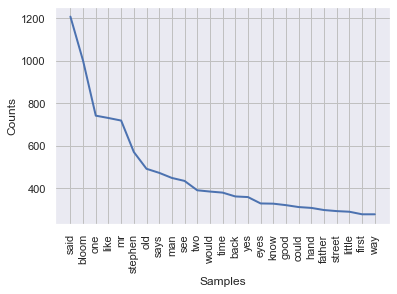

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
# figures inline and viz style
%matplotlib inline
sns.set()

# create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

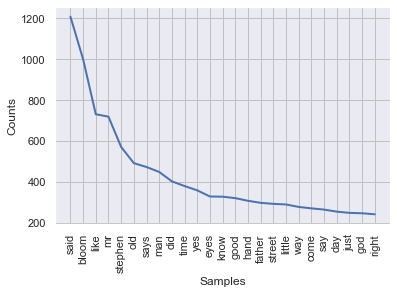

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
# plotting the same chart as above, but using different stop words (to compare the difference)

# import stop words from sklearn
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

# adding sklearn stop words
sw = ["s", "-", "_", "t", "o", "m"] #additional stop words
sw = set(sw + list(ENGLISH_STOP_WORDS))

# new list
words_ns = []
for word in words:
    if word not in sw:
        words_ns.append(word)
        
# create plot
freqdist2 = nltk.FreqDist(words_ns)
freqdist2.plot(25)

## 8. Named entity analysis: Mapping character name variations to root character names

Ulysses is a complex work with a multitude of characters, often mentioned only once or referred to indirectly by different names. To streamline this analysis, I compiled a list of the 30 main characters in the novel. The list below maps the root names of these 30 characters to their name variations used throughout the novel. This mapped list will feed into a  dictionary, which will provide a scope to my sentiment analysis.

In [11]:
# create a df
characters_df = pd.DataFrame({
    "Character": [
        "Leopold Bloom", 
        "Molly Bloom (Marion)", 
        "Stephen Dedalus", 
        "Simon Dedalus", 
        "Buck Mulligan (Malachi)", 
        "Blazes Boylan (Hugh)", 
        "Bella Cohen", 
        "Haines", 
        "Aeolus (the newspaper editor)", 
        "Ned Lambert", 
        "Tom Kernan", 
        "Cyril Sargent", 
        "Gerty MacDowell", 
        "Father John Conmee", 
        "Milly Bloom", 
        "Rudy Bloom", 
        "Martha Clifford", 
        "Mina Purefoy", 
        "Lenehan", 
        "Patrick Dignam", 
        "Garrett Deasy", 
        "John Eglinton", 
        "Hugh 'Citizen' Garry", 
        "Gerty's friends: Cissy Caffrey, Edy Boardman", 
        "W.B. Murphy", 
        "Josie Breen", 
        "John F. Taylor", 
        "J.J. O’Molloy", 
        "Martin Cunningham", 
        "Joe Hynes"
    ],
    "Variations": [
        ["Poldy", "Mr. Bloom", "Bloom", "L. Bloom","leo bloom", "Henry Flower"], 
        ["Mrs. Bloom", "Marion", "Mrs. Marion Bloom", "Molly", "Mrs. M. Bloom", "Penelope", "mrs l m bloom"], 
        ["Stephen", "Mr. Dedalus", "Telemachus", "Dedalus", "D", "Moocow"], 
        ["Mr. Dedalus", "Simon", "Simon Dedalus"], 
        ["Buck", "Mr. Mulligan", "Malachi Mulligan", "Mulligan"], 
        ["Boylan", "Blazes", "Blazes Boylan", "Mr. Boylan"], 
        ["Mrs. Cohen", "Bella", "Bella Cohen"], 
        ["Mr. Haines", "Haines"], 
        ["Aeolus"], 
        ["Ned", "Ned Lambert", "Mr. Lambert"], 
        ["Tom", "Tom Kernan", "Kernan", "Mr. Kernan"], 
        ["Sargent", "Cyril", "Cyril Sargent"], 
        ["Gerty", "Miss MacDowell", "Gerty MacDowell"], 
        ["Father Conmee", "John Conmee", "Father John Conmee"], 
        ["Milly", "Milly Bloom"], 
        ["Rudy", "Rudy Bloom"], 
        ["Martha", "Miss Clifford", "Martha Clifford"], 
        ["Mina", "Mrs. Purefoy", "Mina Purefoy"], 
        ["Mr. Lenehan", "Lenehan"], 
        ["Dignam", "Patrick Dignam", "Paddy Dignam"], 
        ["Mr. Deasy", "Garrett Deasy"], 
        ["Eglinton", "John Eglinton"], 
        ["Citizen", "Hugh Garry", "Hugh 'Citizen' Garry"], 
        ["Cissy Caffrey", "Edy Boardman"], 
        ["Murphy", "W.B. Murphy"], 
        ["Josie", "Josie Breen", "Mrs. Breen"], 
        ["John F. Taylor", "Taylor"], 
        ["J.J. O’Molloy", "O’Molloy"], 
        ["Martin", "Martin Cunningham"], 
        ["Joe", "Joe Hynes"]
    ]
})

# create a long format DataFrame 
long_df = characters_df.explode("Variations")



In [12]:
# printing compact form of character mapping dataframe
characters_df

,Character,Variations
0,Leopold Bloom,"[Poldy, Mr. Bloom, Bloom, L. Bloom, leo bloom,..."
1,Molly Bloom (Marion),"[Mrs. Bloom, Marion, Mrs. Marion Bloom, Molly,..."
2,Stephen Dedalus,"[Stephen, Mr. Dedalus, Telemachus, Dedalus, D,..."
3,Simon Dedalus,"[Mr. Dedalus, Simon, Simon Dedalus]"
4,Buck Mulligan (Malachi),"[Buck, Mr. Mulligan, Malachi Mulligan, Mulligan]"
5,Blazes Boylan (Hugh),"[Boylan, Blazes, Blazes Boylan, Mr. Boylan]"
6,Bella Cohen,"[Mrs. Cohen, Bella, Bella Cohen]"
7,Haines,"[Mr. Haines, Haines]"
8,Aeolus (the newspaper editor),[Aeolus]
9,Ned Lambert,"[Ned, Ned Lambert, Mr. Lambert]"


In [13]:
# printing exploded form of characters dataframe showing a row for reach Character-Variation pair
long_df

,Character,Variations
0,Leopold Bloom,Poldy
0,Leopold Bloom,Mr. Bloom
0,Leopold Bloom,Bloom
0,Leopold Bloom,L. Bloom
0,Leopold Bloom,leo bloom
...,...,...
27,J.J. O’Molloy,O’Molloy
28,Martin Cunningham,Martin
28,Martin Cunningham,Martin Cunningham
29,Joe Hynes,Joe


In [14]:
# create a dictionary to map each variation to the root character name
name_map = dict(zip(long_df['Variations'], long_df['Character']))
name_map

{'Poldy': 'Leopold Bloom',
 'Mr. Bloom': 'Leopold Bloom',
 'Bloom': 'Leopold Bloom',
 'L. Bloom': 'Leopold Bloom',
 'leo bloom': 'Leopold Bloom',
 'Henry Flower': 'Leopold Bloom',
 'Mrs. Bloom': 'Molly Bloom (Marion)',
 'Marion': 'Molly Bloom (Marion)',
 'Mrs. Marion Bloom': 'Molly Bloom (Marion)',
 'Molly': 'Molly Bloom (Marion)',
 'Mrs. M. Bloom': 'Molly Bloom (Marion)',
 'Penelope': 'Molly Bloom (Marion)',
 'mrs l m bloom': 'Molly Bloom (Marion)',
 'Stephen': 'Stephen Dedalus',
 'Mr. Dedalus': 'Simon Dedalus',
 'Telemachus': 'Stephen Dedalus',
 'Dedalus': 'Stephen Dedalus',
 'D': 'Stephen Dedalus',
 'Moocow': 'Stephen Dedalus',
 'Simon': 'Simon Dedalus',
 'Simon Dedalus': 'Simon Dedalus',
 'Buck': 'Buck Mulligan (Malachi)',
 'Mr. Mulligan': 'Buck Mulligan (Malachi)',
 'Malachi Mulligan': 'Buck Mulligan (Malachi)',
 'Mulligan': 'Buck Mulligan (Malachi)',
 'Boylan': 'Blazes Boylan (Hugh)',
 'Blazes': 'Blazes Boylan (Hugh)',
 'Blazes Boylan': 'Blazes Boylan (Hugh)',
 'Mr. Boylan': 'Bla

## 9. Helper functions to normalize text: stripping away punctuation and converting all text to lower case

In [15]:
# define a function to normalize text: remove punctuation and convert to lowercase
def normalize_text(text):
    return text.translate(str.maketrans('', '', string.punctuation)).lower()

In [16]:
# create a normalized name mapping: make all keys and root names in name_map lowercase to standardize them
normalized_name_map = {normalize_text(k).lower(): normalize_text(v).lower() for k, v in name_map.items()}
normalized_name_map


{'poldy': 'leopold bloom',
 'mr bloom': 'leopold bloom',
 'bloom': 'leopold bloom',
 'l bloom': 'leopold bloom',
 'leo bloom': 'leopold bloom',
 'henry flower': 'leopold bloom',
 'mrs bloom': 'molly bloom marion',
 'marion': 'molly bloom marion',
 'mrs marion bloom': 'molly bloom marion',
 'molly': 'molly bloom marion',
 'mrs m bloom': 'molly bloom marion',
 'penelope': 'molly bloom marion',
 'mrs l m bloom': 'molly bloom marion',
 'stephen': 'stephen dedalus',
 'mr dedalus': 'simon dedalus',
 'telemachus': 'stephen dedalus',
 'dedalus': 'stephen dedalus',
 'd': 'stephen dedalus',
 'moocow': 'stephen dedalus',
 'simon': 'simon dedalus',
 'simon dedalus': 'simon dedalus',
 'buck': 'buck mulligan malachi',
 'mr mulligan': 'buck mulligan malachi',
 'malachi mulligan': 'buck mulligan malachi',
 'mulligan': 'buck mulligan malachi',
 'boylan': 'blazes boylan hugh',
 'blazes': 'blazes boylan hugh',
 'blazes boylan': 'blazes boylan hugh',
 'mr boylan': 'blazes boylan hugh',
 'mrs cohen': 'bell

## 10. Performing a sentence-wise sentiment analysis on the entire book

In [17]:
# rename the text file to dedalus
dedalus = text

In [18]:
# first, tokenize sentences from the original Ulysses text
from nltk import sent_tokenize
sents = [x.lower() for x in sent_tokenize(dedalus)]

In [19]:
# then, normalize text to set to lower case and remove punctuation
sents = [normalize_text(x) for x in sents]

In [21]:
%%time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Computing the sentiment!

# creating entity dictionary to store sentiment results for each character
entity_dict=dict() 
for entity in normalized_name_map:
    entity_dict[entity] = [0,0] #[sentiment total, number of sentences]

# loading analyzer    
analyzer = SentimentIntensityAnalyzer()

# this for loop checks each token for an entity and calculates the compound sentiment 
# for that token, logging the cumulative count 
for sent in sents:
    for ent in entity_dict:
        if ent in sent:
            va = analyzer.polarity_scores(sent)
            entity_dict[ent][0] += va['compound']
            entity_dict[ent][1] += 1
            
# calcualate net sentiment (total compound score/number of sentences) for each entity
sentiments = dict()
for ent,vals in entity_dict.items():
    try:
        sentiments[ent] = vals[0]/vals[1]
    except:
        sentiments[ent] = 0.0

sentiments

CPU times: user 3min 26s, sys: 1.25 s, total: 3min 27s
Wall time: 3min 27s


{'poldy': 0.0054611111111111145,
 'mr bloom': 0.0587882608695652,
 'bloom': 0.05975493387589014,
 'l bloom': 0.47387142857142855,
 'leo bloom': 0.0,
 'henry flower': 0.18897,
 'mrs bloom': 0.3333333333333333,
 'marion': 0.10810555555555557,
 'mrs marion bloom': 0.3333333333333333,
 'molly': 0.1193357142857143,
 'mrs m bloom': 0.0,
 'penelope': 0.21501428571428569,
 'mrs l m bloom': 0.4588,
 'stephen': 0.053462857142857145,
 'mr dedalus': -0.00403177570093458,
 'telemachus': 0.0,
 'dedalus': -0.0047266272189349055,
 'd': 0.04917836265044324,
 'moocow': 0.0,
 'simon': 0.07483684210526316,
 'simon dedalus': -0.03243999999999996,
 'buck': 0.07066011904761904,
 'mr mulligan': 0.09606666666666668,
 'malachi mulligan': 0.2204777777777778,
 'mulligan': 0.041175609756097555,
 'boylan': 0.1142593220338983,
 'blazes': 0.09372619047619046,
 'blazes boylan': 0.08614074074074074,
 'mr boylan': -0.09534000000000001,
 'mrs cohen': 0.10606666666666666,
 'bella': -0.003959574468085101,
 'bella cohen': -

In [22]:
# code to aggregate the sentiment across all the name variations and map them to the root 
# characters names to calculate a final sentiment score based on the arithmetic mean of
# the sentiments scores given to each name variation


# create an empty dictionary to store scores
accumulated_dict = {}

# For each variation get the corresponding root name and add the value and total count of 
# variations to the accumulated_dict, store it all as a dict of dicts
for variation, value in sentiments.items():
    root_name = normalized_name_map.get(variation)
    if root_name:
        if root_name in accumulated_dict:
            accumulated_dict[root_name]['sum'] += value
            accumulated_dict[root_name]['count'] += 1
        else:
            accumulated_dict[root_name] = {'sum': value, 'count': 1}

# calculate averages
averages = {}
for root_name, data in accumulated_dict.items():
    averages[root_name] = data['sum'] / data['count']

# store results in dataframe for easy viewing, sorted by highest average score (most positively
# viewed character) to lowest average score (most negatively viewed character)

df = pd.DataFrame({'Root name': list(averages.keys()), 'Average score': list(averages.values())})

df = df.sort_values(by='Average score', ascending=False)

df

,Root name,Average score
14,milly bloom,0.386536
7,haines,0.287182
18,lenehan,0.278477
23,gertys friends cissy caffrey edy boardman,0.263717
1,molly bloom marion,0.223989
12,gerty macdowell,0.220055
25,josie breen,0.181869
0,leopold bloom,0.131141
10,tom kernan,0.120293
21,john eglinton,0.118341


## 11. Conclusion
I performed a sentiment analysis on James Joyce's Ulysses and the results, as displayed in the table above, contribute an extra dimension to my understanding of the novel's characters. Characters such as Milly Bloom, Haines, and Lenehan, for instance, have relatively higher sentiment scores, suggesting a more positive or favorable sentiment attached to them. In contrast, characters like Bella Cohen and Patrick Dignam have lower sentiment scores, indicative of a more negative or unfavorable sentiment. These differing sentiments underscore the multifaceted nature of the characters in Ulysses.

It's essential to interpret these sentiment scores with a degree of skepticism. While sentiment analysis is a valuable tool, it does not fully grasp the literary nuances and complex layers of meaning inherent in Joyce's writing. Characters in Ulysses cannot be neatly compartmentalized into simplistic positive or negative categories, because they have been carefully crafted to mirror the complexities and contradictions of human experience. While the results offer an initial perspective on the emotional undertones linked with the characters, it is important to supplement this analysis with a wider exploration of the novel's historical context, themes, and language, which are all masterfully crafted by Joyce.